In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D , ZeroPadding2D,Convolution2D,BatchNormalization,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from tensorflow.keras.optimizers import Adam
import numpy as np
import os
from matplotlib import pyplot as plt
from tensorflow import keras

Using TensorFlow backend.


In [2]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [3]:
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
cpus = tf.config.experimental.list_physical_devices(device_type='CPU')
print(gpus, cpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [4]:
#資料增強
img_gen_train = ImageDataGenerator(featurewise_center=True,
                             featurewise_std_normalization=True,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=False,
                             rescale=1./255,
                             dtype=np.float32
                            )

img_gen_test = ImageDataGenerator(      
                             rescale=1./255,
                             dtype=np.float32
                            )

In [12]:
img_size = (224,224)
batch_size = 32
epoch = 30

In [6]:
train_generator = img_gen_train.flow_from_directory(
        "C:/Users/user/Desktop/catdog/train",
        target_size=img_size,       # resize images to (224,224) to increase the training speed and efficiency
        batch_size=batch_size,
        )

Found 16000 images belonging to 2 classes.


In [7]:
for train_data , train_label in train_generator:
    print('train_date shape:', train_data.shape)
    print('train_label shape:', train_label.shape)
    break

C:\Users\user\DL\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\user\DL\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


train_date shape: (32, 224, 224, 3)
train_label shape: (32, 2)


In [18]:
test_generator = img_gen_test.flow_from_directory(
    "C:/Users/user/Desktop/catdog/test",
     target_size=img_size,
     batch_size=batch_size,
    )

Found 4000 images belonging to 2 classes.


In [17]:
for test_data , test_label in test_generator:
    print('train_date shape:', test_data.shape)
    print('train_label shape:', test_label.shape)
    break

train_date shape: (32, 224, 224, 3)
train_label shape: (32, 2)


In [65]:
model = Sequential()
model.add(Conv2D(filters = 8,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 8,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 8,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 16,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
# model.add(Dense(2,activation = 'sigmoid'))
model.add(Dense(2,activation = 'softmax'))

model.summary()
# model.compile(loss = 'binary_crossentropy', optimizer = 'Adam',metrics=["accuracy"])
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam',metrics=["accuracy"])

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_177 (Conv2D)          (None, 224, 224, 8)       224       
_________________________________________________________________
batch_normalization_168 (Bat (None, 224, 224, 8)       32        
_________________________________________________________________
conv2d_178 (Conv2D)          (None, 224, 224, 8)       584       
_________________________________________________________________
batch_normalization_169 (Bat (None, 224, 224, 8)       32        
_________________________________________________________________
conv2d_179 (Conv2D)          (None, 224, 224, 8)       584       
_________________________________________________________________
max_pooling2d_159 (MaxPoolin (None, 112, 112, 8)       0         
_________________________________________________________________
batch_normalization_170 (Bat (None, 112, 112, 8)     

In [66]:
history = model.fit(train_generator,
                   steps_per_epoch = (16000//batch_size),
                    validation_data = test_generator,
                    validation_steps = (4000//batch_size),
                    epochs = epoch,
                   )

C:\Users\user\DL\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\user\DL\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 125 steps
Epoch 1/30


C:\Users\user\DL\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\user\DL\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


500/500 [==============================] - 166s 331ms/step - loss: 0.6554 - accuracy: 0.6351 - val_loss: 0.5635 - val_accuracy: 0.7150
Epoch 2/30
500/500 [==============================] - 157s 315ms/step - loss: 0.5727 - accuracy: 0.6993 - val_loss: 1.2378 - val_accuracy: 0.5230
Epoch 3/30
500/500 [==============================] - 158s 315ms/step - loss: 0.5103 - accuracy: 0.7492 - val_loss: 0.5577 - val_accuracy: 0.7560
Epoch 4/30
500/500 [==============================] - 158s 316ms/step - loss: 0.4540 - accuracy: 0.7816 - val_loss: 0.4763 - val_accuracy: 0.7880
Epoch 5/30
500/500 [==============================] - 159s 317ms/step - loss: 0.3883 - accuracy: 0.8222 - val_loss: 0.5002 - val_accuracy: 0.8010
Epoch 6/30
500/500 [==============================] - 158s 317ms/step - loss: 0.3317 - accuracy: 0.8547 - val_loss: 0.4268 - val_accuracy: 0.8160
Epoch 7/30
500/500 [==============================] - 159s 318ms/step - loss: 0.2871 - accuracy: 0.8766 - val_loss: 0.4036 - val_accura

In [67]:
model.save('catdog_classify.h5')

In [69]:
TrainERR=history.history['loss']
ValidERR=history.history['val_loss']
TrainACC = history.history['accuracy']
ValidACC = history.history['val_accuracy']

<Figure size 432x288 with 0 Axes>

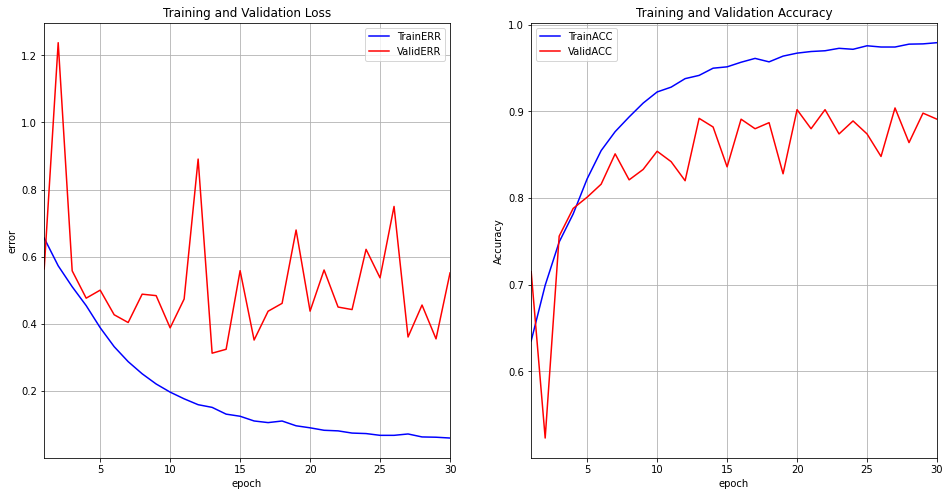

In [70]:
plt.clf()

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(range(1,epoch+1),TrainERR,'b',label='TrainERR')
plt.plot(range(1,epoch+1),ValidERR,'r',label='ValidERR')
plt.xlim([1,epoch])
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.ylabel('error')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1,epoch+1),TrainACC,'b',label='TrainACC')
plt.plot(range(1,epoch+1),ValidACC,'r',label='ValidACC')
plt.xlim([1,epoch])
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid(True)


plt.savefig('Learning_curve_animal_classify.jpg')
plt.show()

In [73]:
from keras.preprocessing import image

img = image.load_img("C:/Users/user/Desktop/catdog/raw/cat/1638.jpeg",target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255

{'cat': 0.99999917}
{'dog': 7.885252e-07}
有 1.0 這是一隻cat！


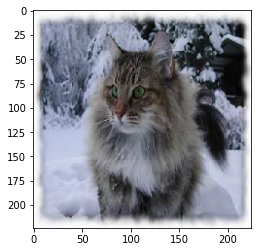

In [74]:
proba = model.predict(img.reshape(1,224,224,3))
animal_list = ['cat','dog']
for i in range(2):
    x = {str(animal_list[i]):proba[0][i]} 
    print(x)
max_prob = round(proba[0].max(), 2)
max_animal = animal_list[proba[0].argmax()]
print(f'有 {max_prob} 這是一隻{max_animal}！')
plt.imshow(img);